In [1]:
cd ../..

/home/msi/projects/diplomka


In [2]:
import json
import glob
from pprint import pprint
import matplotlib.pyplot as plt


In [3]:
import numpy as np

In [4]:
np.random.seed(42)

In [5]:
files = sorted(glob.glob("data/sites/INFN-T1/*.json"))


In [6]:
selected_files = np.random.choice(files, 1000)

In [7]:
def load_json(file):
    with open(file) as f:
        return json.load(f)


In [8]:
loaded_files = [load_json(x) for x in selected_files]

In [65]:
import copy

file = copy.deepcopy(loaded_files[0])

In [66]:
subfields = {k:v for k,v in file.items() 
 if (k not in ['asns', 'hops', 'rtts', 'ttls']) and ( k.startswith('src_') or k.startswith('dest_') or k == 'src' or k == 'dest')}

for k,v in sorted(subfields.items()):
    print(k, v)
    del file[k]

dest 2001:760:4205:254::11
dest_VO ATLAS
dest_host perfsonar-ps.cnaf.infn.it
dest_production True
dest_site INFN-T1
src 2001:660:5009:9:193:48:99:76
src_VO ATLAS
src_host ccperfsonar2.in2p3.fr
src_production True
src_site IN2P3-CC


In [67]:
print('asns', 'hops', 'rtts', 'ttls', sep=' ; ')
for items in zip(file['asns'], file['hops'], file['rtts'], file['ttls']):
    print(*items, sep=' ; ')
del file['asns']
del file['hops']
del file['rtts']
del file['ttls']

asns ; hops ; rtts ; ttls
2200 ; 2001:660:5009:9:193:48:99:100 ; 0.8 ; 1
2200 ; 2001:660:5009::11:1 ; 0.9 ; 2
2200 ; 2001:660:7904:189::1 ; 1.8 ; 3
20965 ; 2001:798:111:1::1 ; 2.5 ; 4
20965 ; 2001:798:111:1::1e ; 12.6 ; 5
137 ; 2001:760:ffff:110::2b ; 13.799999999999999 ; 8
137 ; 2001:760:4205:254::11 ; 12.1 ; 11


In [68]:
print("timestamp", file['timestamp'])
del file['timestamp']

timestamp 1678009539000


In [69]:
print("path_complete", file['path_complete'])
del file['path_complete']
print("destination_reached", file['destination_reached'])
del file['destination_reached']
print("looping", file['looping'])
del file['looping']
print("ipv6", file['ipv6'])
del file['ipv6']
print("push", file['push'])
del file['push'] # maybe useless

path_complete False
destination_reached True
looping False
ipv6 True
push False


In [70]:
pprint(file)

{'MA': '2001:660:5009:9:193:48:99:76',
 'created_at': '2023-03-05T09:48:51.631233853Z',
 'max_rtt': 13.799999999999999,
 'n_hops': 7,
 'route-sha1': '9465711a3eccf84e667f49745d503d22332f43d3'}


In [71]:
file.keys()

dict_keys(['max_rtt', 'created_at', 'MA', 'n_hops', 'route-sha1'])

In [97]:
max_rtts  = [x.get('max_rtt', 0) for x in loaded_files]
n_hops  = [x.get('n_hops', 0) for x in loaded_files]

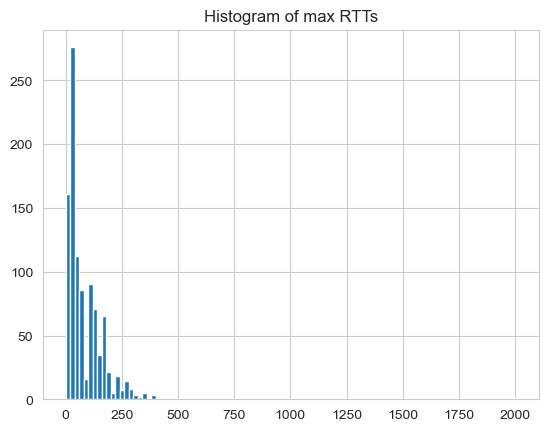

In [98]:

plt.hist(max_rtts, bins=100)
plt.title("Histogram of max RTTs")
plt.show()

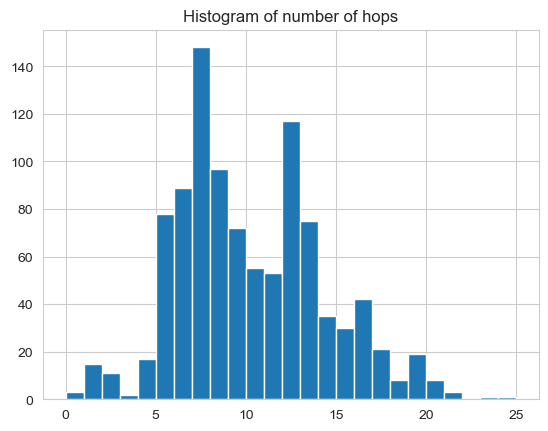

In [99]:
plt.hist(n_hops, bins=25)
plt.title("Histogram of number of hops")
plt.show()

Text(0.5, 1.0, 'Number of hops vs max RTT')

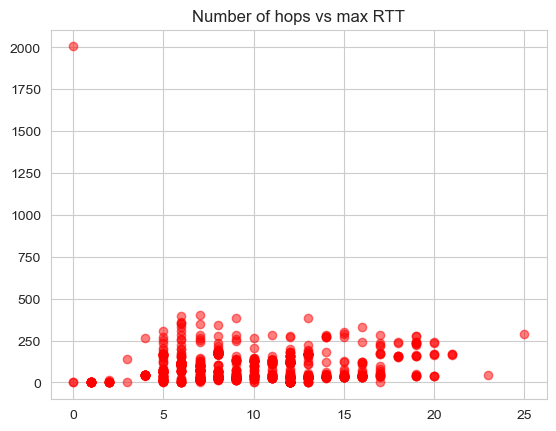

In [107]:
plt.scatter(n_hops, max_rtts, c='r', alpha=0.5)
plt.title("Number of hops vs max RTT")

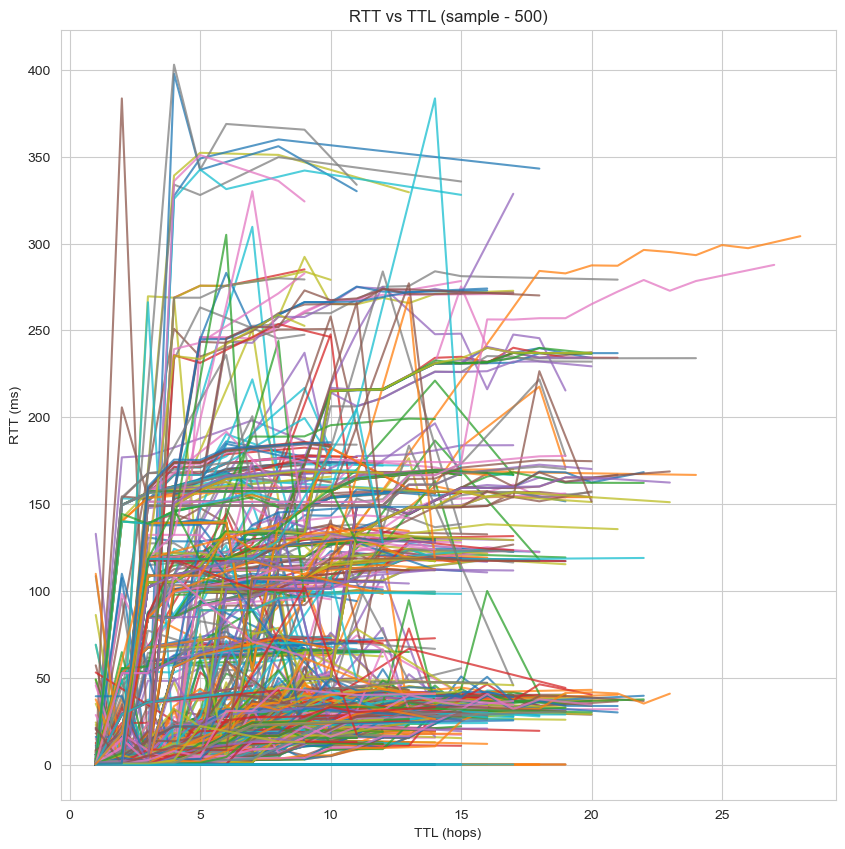

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()  
for item in loaded_files:
    try:
        ax.plot(item['ttls'], item['rtts'], label=f"{item['src_site']}-{item['dest_site']}", alpha=0.75)
    except KeyError:
        pass
    
ax.set_ylabel("RTT (ms)")
ax.set_xlabel("TTL (hops)")
plt.title("RTT vs bTTL (sample - 500)")
plt.show()